# __Modelling__

!pip install category_encoders

In [1]:
!pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.feature_selection import RFE, SelectKBest, SelectPercentile
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, \
recall_score, precision_score, plot_confusion_matrix, SCORERS, plot_roc_curve, roc_curve,plot_precision_recall_curve, precision_recall_curve

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')
import sklearn

%matplotlib inline

pd.options.display.max_columns = None
# pd.options.display.max_rows = None

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('hr_clean.csv')
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
df['gender'].value_counts()

Male      13412
Female     1238
Name: gender, dtype: int64

In [5]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [6]:
df.isna().sum()/len(df)*100

city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [7]:
df2 = df.drop(['training_hours'], axis=1).copy()
df2.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0.0


In [8]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
df2.columns.nunique()

12

In [10]:
df2.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job', 'target'],
      dtype='object')

In [11]:
X = df2.drop(columns='target')
y = df2['target'].astype('int')

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=.2, stratify=y, random_state=2021)

## __Base Models__

The target was imbalance. There are 2 ways of technique was used to balance the target:

1. Setting the parameter "(class_weight='balanced')" for models which have it and their "random_state" parameter respectively.
1. Using SMOTE oversampling method and setting the "random_state" parameter for models that don't have "class_weight" parameter.


In [12]:
LogReg = LogisticRegression(random_state=2021, class_weight='balanced')
dtc = DecisionTreeClassifier(random_state=2021, class_weight='balanced')
rfc = RandomForestClassifier(random_state=2021, class_weight='balanced')
svc = SVC(random_state=2021, class_weight='balanced')
abc = AdaBoostClassifier(random_state=2021)
gbc = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
knc = KNeighborsClassifier()

In [13]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  target                  19158 non-null  float64
dtypes: float64(2), object(10)
memory usage: 1.8+ MB


In [15]:
mis_columns = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
cat_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']
ord_columns = ['education_level', 'experience', 'company_size', 'last_new_job']

In [16]:
df2.head(1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,1.0


In [17]:
lg_scale = Pipeline([
    ('scaler', RobustScaler())
])

lg_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)),
    ('binary', ce.BinaryEncoder())
])

ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)),
    ('ordinal', ce.OrdinalEncoder()) 
])

transformer = ColumnTransformer([
    ('num', lg_scale, ['city_development_index']),
    ('poly', PolynomialFeatures(include_bias=False, degree=3), ['city_development_index']),
    ('cat', lg_pipe_cat, ['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']),
    ('ord', ord_pipe, ['education_level', 'experience', 'company_size', 'last_new_job'])
], remainder = 'passthrough')


In [18]:
lg_pipe_all = Pipeline([
    ('transformer', transformer),
    ('all_logit', LogReg)
])

In [19]:
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

In [20]:
rskf = RepeatedStratifiedKFold(random_state=2021)
lg_cv = cross_val_score(lg_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.3s finished


In [21]:
print('CV Logistic Regression', lg_cv)
print('CV Logistic Regression', lg_cv.mean())

CV Logistic Regression [0.63267974 0.66928105 0.66361257 0.65837696 0.66230366 0.61830065
 0.64705882 0.65445026 0.66492147 0.67801047 0.65751634 0.65882353
 0.65183246 0.65575916 0.65445026 0.62091503 0.6745098  0.65445026
 0.68848168 0.64397906 0.6496732  0.65620915 0.64790576 0.65575916
 0.68324607 0.65751634 0.65882353 0.64005236 0.66230366 0.64136126
 0.66666667 0.6379085  0.66230366 0.64921466 0.67408377 0.67581699
 0.67189542 0.62565445 0.65706806 0.65968586 0.67189542 0.64183007
 0.65968586 0.65837696 0.64267016 0.69934641 0.65228758 0.64528796
 0.65183246 0.65183246]
CV Logistic Regression 0.6563581425589433


In [22]:
dtc_pipe_all = Pipeline([
    ('transformer', transformer),
    ('all_dtc', dtc)
])

In [23]:
rskf = RepeatedStratifiedKFold(random_state=2021)
dtc_cv = cross_val_score(dtc_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.3s finished


In [24]:
print('CV Decision Tree Classifier', dtc_cv)
print('CV Decision Tree Classifier', dtc_cv.mean())

CV Decision Tree Classifier [0.48104575 0.48627451 0.5039267  0.4921466  0.51570681 0.46666667
 0.51111111 0.5078534  0.4921466  0.51701571 0.49803922 0.50196078
 0.4882199  0.5013089  0.5091623  0.45228758 0.47058824 0.5091623
 0.54319372 0.5026178  0.48888889 0.50457516 0.47120419 0.4895288
 0.5        0.51633987 0.49411765 0.4934555  0.5078534  0.5039267
 0.52810458 0.47189542 0.52617801 0.48429319 0.45680628 0.52156863
 0.4745098  0.4895288  0.51439791 0.47382199 0.49150327 0.49281046
 0.5052356  0.5104712  0.48691099 0.52941176 0.46405229 0.48560209
 0.4960733  0.48036649]
CV Decision Tree Classifier 0.49607733634466


In [25]:
rfc_pipe_all = Pipeline([
    ('transformer', transformer),
    ('all_rfc', rfc)
])

In [26]:
rskf = RepeatedStratifiedKFold(random_state=2021)
rfc_cv = cross_val_score(rfc_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [27]:
print('CV Random Forest Classifier ', rfc_cv)
print('CV Random Forest Classifier', rfc_cv.mean())

CV Random Forest Classifier  [0.42352941 0.4248366  0.46858639 0.46989529 0.46596859 0.42745098
 0.46666667 0.47120419 0.45680628 0.48429319 0.45359477 0.46013072
 0.46596859 0.45811518 0.45811518 0.4130719  0.44052288 0.47251309
 0.5039267  0.45026178 0.46405229 0.43267974 0.46727749 0.43586387
 0.47382199 0.47058824 0.43529412 0.42670157 0.46204188 0.44895288
 0.47581699 0.42875817 0.45942408 0.46465969 0.43324607 0.47843137
 0.45098039 0.42277487 0.44764398 0.46204188 0.43921569 0.43006536
 0.46989529 0.44633508 0.45811518 0.47973856 0.4496732  0.46727749
 0.44764398 0.45811518]
CV Random Forest Classifier 0.454451699004209


In [28]:
svc_pipe_all = Pipeline([
    ('transformer', transformer),
    ('all_svc', svc)
])

In [29]:
rskf = RepeatedStratifiedKFold(random_state=2021)
svc_cv = cross_val_score(svc_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.0min finished


In [30]:
print('CV Support Vector Classifier', svc_cv)
print('CV Support Vector Classifier', svc_cv.mean())

CV Support Vector Classifier [0.61699346 0.65490196 0.66492147 0.65183246 0.64528796 0.59869281
 0.61568627 0.65445026 0.65706806 0.66230366 0.63921569 0.6496732
 0.64528796 0.64397906 0.62696335 0.60653595 0.65228758 0.63874346
 0.67146597 0.64005236 0.62091503 0.64052288 0.64267016 0.64790576
 0.66230366 0.64575163 0.66405229 0.61649215 0.63743455 0.62303665
 0.6496732  0.61045752 0.64005236 0.64005236 0.65968586 0.65882353
 0.67058824 0.62958115 0.63874346 0.65052356 0.65098039 0.61437908
 0.65314136 0.65183246 0.62434555 0.6875817  0.64052288 0.61910995
 0.62434555 0.60863874]
CV Support Vector Classifier 0.6412097320603634


In [31]:
abc_pipe_all = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('all_abc', abc)
])

In [32]:
rskf = RepeatedStratifiedKFold(random_state=2021)
abc_cv = cross_val_score(abc_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [33]:
print('CV Ada Boost Classifier', abc_cv)
print('CV Ada Boost Classifier', abc_cv.mean())

CV Ada Boost Classifier [0.50457516 0.55816993 0.62303665 0.61780105 0.59554974 0.52810458
 0.5620915  0.55104712 0.53664921 0.59293194 0.57647059 0.59215686
 0.61518325 0.54712042 0.58900524 0.53856209 0.60522876 0.55628272
 0.58115183 0.56937173 0.54509804 0.59477124 0.56282723 0.57068063
 0.61125654 0.60915033 0.57908497 0.56413613 0.61387435 0.54057592
 0.61176471 0.55686275 0.58246073 0.57068063 0.58376963 0.59869281
 0.59477124 0.58769634 0.61256545 0.54319372 0.5503268  0.57124183
 0.58507853 0.59162304 0.56544503 0.5254902  0.56862745 0.58376963
 0.59947644 0.59031414]
CV Ada Boost Classifier 0.576115936077747


In [34]:
gbc_pipe_all = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('all_gbc', gbc)
])

In [35]:
rskf = RepeatedStratifiedKFold(random_state=2021)
gbc_cv = cross_val_score(gbc_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


In [36]:
print('CV Gradient Boosting Classifier', gbc_cv)
print('CV Gradient Boosting Classifier', gbc_cv.mean())

CV Gradient Boosting Classifier [0.5620915  0.57124183 0.59816754 0.60078534 0.58638743 0.54379085
 0.56993464 0.59685864 0.56282723 0.61256545 0.56732026 0.5751634
 0.58638743 0.59816754 0.57329843 0.58039216 0.56732026 0.57984293
 0.60863874 0.58769634 0.55686275 0.58039216 0.58900524 0.58638743
 0.60340314 0.60653595 0.57908497 0.54842932 0.59162304 0.57853403
 0.59738562 0.55947712 0.60471204 0.57722513 0.57068063 0.58823529
 0.58954248 0.56806283 0.60340314 0.57984293 0.60261438 0.58823529
 0.59947644 0.56675393 0.56151832 0.60784314 0.55686275 0.58115183
 0.58376963 0.59554974]
CV Gradient Boosting Classifier 0.582629572596927


In [37]:
xgb_pipe_all = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('all_xgb', xgb)
])

In [38]:
rskf = RepeatedStratifiedKFold(random_state=2021)
xgb_cv = cross_val_score(xgb_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [39]:
print('CV XGB Classifier', xgb_cv)
print('CV XGB Classifier', xgb_cv.mean())

CV XGB Classifier [0.55424837 0.57777778 0.60471204 0.60732984 0.58115183 0.53986928
 0.5620915  0.59031414 0.56282723 0.61910995 0.56470588 0.58039216
 0.59031414 0.60602094 0.57068063 0.56993464 0.58300654 0.59031414
 0.61256545 0.59031414 0.55424837 0.58431373 0.59162304 0.58376963
 0.61387435 0.60522876 0.57908497 0.55366492 0.59424084 0.57984293
 0.60261438 0.5751634  0.59685864 0.57853403 0.57722513 0.59607843
 0.58169935 0.56675393 0.61125654 0.58246073 0.61437908 0.59738562
 0.59031414 0.57722513 0.56806283 0.60784314 0.56339869 0.58769634
 0.57591623 0.59816754]
CV XGB Classifier 0.5849321082708826


In [40]:
knc_pipe_all = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('all_knc', knc)
])

In [41]:
rskf = RepeatedStratifiedKFold(random_state=2021)
knc_cv = cross_val_score(knc_pipe_all, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.6s finished


In [42]:
print('CV K Nearest Classifier', knc_cv)
print('CV K Nearest Classifier', knc_cv.mean())

CV K Nearest Classifier [0.61960784 0.64183007 0.66623037 0.66623037 0.64136126 0.66535948
 0.67189542 0.65314136 0.65183246 0.67670157 0.63921569 0.63660131
 0.64136126 0.64921466 0.66492147 0.62745098 0.64575163 0.63874346
 0.65837696 0.66099476 0.62222222 0.66535948 0.64790576 0.63481675
 0.67277487 0.6496732  0.62091503 0.63743455 0.65968586 0.65706806
 0.66928105 0.61045752 0.65445026 0.67277487 0.63219895 0.65228758
 0.65359477 0.60863874 0.65968586 0.64267016 0.66666667 0.6496732
 0.65183246 0.65314136 0.67408377 0.68496732 0.6627451  0.64790576
 0.64267016 0.65968586]
CV K Nearest Classifier 0.6506817917393835


## __Tune Models__

Using SelectPercentile in sklearn, the features of the data is automatically selected based on the percentile parameter.

In [43]:
# top 3 best base models
print('CV Logistic Regression', lg_cv.mean())
print('CV Support Vector Classifier', svc_cv.mean())
print('CV K Nearest Classifier', knc_cv.mean())

CV Logistic Regression 0.6563581425589433
CV Support Vector Classifier 0.6412097320603634
CV K Nearest Classifier 0.6506817917393835


In [44]:
lg_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percen', SelectPercentile(percentile=50)),
    ('all_logit', LogReg)
])
#select k best, rfe dan percentile malah jelek

In [45]:
rskf = RepeatedStratifiedKFold(random_state=2021)
lg_cv_tuned = cross_val_score(lg_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.0s finished


In [46]:
print('CV Logistic Regression Percentile', lg_cv_tuned)
print('CV Logistic Regression Percentile', lg_cv_tuned.mean())

CV Logistic Regression Percentile [0.62614379 0.66928105 0.66361257 0.66099476 0.65314136 0.60392157
 0.64183007 0.64921466 0.65314136 0.67539267 0.65098039 0.65359477
 0.64397906 0.67146597 0.63743455 0.6248366  0.67843137 0.65052356
 0.68193717 0.64005236 0.64705882 0.64444444 0.64397906 0.65837696
 0.66884817 0.65882353 0.63398693 0.62172775 0.67931937 0.63089005
 0.66405229 0.64313725 0.64921466 0.65314136 0.66884817 0.69411765
 0.67581699 0.64397906 0.65575916 0.66230366 0.66143791 0.62614379
 0.65575916 0.65837696 0.62041885 0.68627451 0.64183007 0.62827225
 0.64267016 0.65575916]
CV Logistic Regression Percentile 0.6520935564452657


In [47]:
dtc_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percen', SelectPercentile(percentile=50)),
    ('all_dtc', dtc)
])
# select kbest jelek, percentile bagus ,rfe jelek

In [48]:
rskf = RepeatedStratifiedKFold(random_state=2021)
dtc_cv_tuned = cross_val_score(dtc_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.6s finished


In [49]:
print('CV Decision Tree Classifier Percentile', dtc_cv_tuned)
print('CV Decision Tree Classifier Percentile', dtc_cv_tuned.mean())

CV Decision Tree Classifier Percentile [0.68366013 0.70718954 0.72513089 0.71596859 0.62172775 0.70718954
 0.61568627 0.70026178 0.71073298 0.71465969 0.68366013 0.72418301
 0.65445026 0.71989529 0.70680628 0.70849673 0.59738562 0.71204188
 0.72382199 0.73036649 0.70980392 0.60522876 0.69240838 0.58376963
 0.70418848 0.73986928 0.70588235 0.70811518 0.69895288 0.73429319
 0.71503268 0.72156863 0.72643979 0.73167539 0.68979058 0.59215686
 0.69673203 0.68586387 0.70680628 0.71858639 0.7124183  0.69803922
 0.70811518 0.70418848 0.70811518 0.76732026 0.6875817  0.70680628
 0.72382199 0.70811518]
CV Decision Tree Classifier Percentile 0.6971000239537349


In [50]:
rfc_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percen', SelectPercentile(percentile=50)),
    ('all_rfc', rfc)
])
#rfe, select kbest jelek

In [51]:
rskf = RepeatedStratifiedKFold(random_state=2021)
rfc_cv_tuned = cross_val_score(rfc_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.1s finished


In [52]:
print('CV Random Forest Classifier Percentile', rfc_cv_tuned)
print('CV Random Forest Classifier Percentile', rfc_cv_tuned.mean())

CV Random Forest Classifier Percentile [0.64836601 0.6627451  0.67670157 0.67931937 0.56806283 0.66405229
 0.56339869 0.67146597 0.65575916 0.66884817 0.6627451  0.69019608
 0.60732984 0.70418848 0.68062827 0.67843137 0.54379085 0.68062827
 0.69109948 0.69371728 0.67973856 0.54771242 0.65968586 0.52225131
 0.67539267 0.70196078 0.67058824 0.66361257 0.65575916 0.67408377
 0.67058824 0.6875817  0.69764398 0.69764398 0.65445026 0.54248366
 0.66143791 0.66099476 0.68848168 0.69895288 0.67189542 0.66797386
 0.66623037 0.66492147 0.67801047 0.72156863 0.64052288 0.66753927
 0.67801047 0.66099476]
CV Random Forest Classifier Percentile 0.6584037230948225


In [53]:
svc_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percen', SelectPercentile(percentile=50)),
    ('all_svc', svc)
])
# select kbest jelek, percentile bagus

In [54]:
rskf = RepeatedStratifiedKFold(random_state=2021)
svc_cv_tuned = cross_val_score(svc_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


In [55]:
print('CV Support Vector Classifier Percentile', svc_cv_tuned)
print('CV Support Vector Classifier Percentile', svc_cv_tuned.mean())

CV Support Vector Classifier Percentile [0.70980392 0.73986928 0.7539267  0.7473822  0.65314136 0.72026144
 0.62614379 0.70680628 0.70811518 0.71727749 0.71111111 0.73594771
 0.70942408 0.7604712  0.71073298 0.70849673 0.65620915 0.73298429
 0.78272251 0.7486911  0.70326797 0.64052288 0.7513089  0.65706806
 0.7604712  0.7372549  0.75294118 0.68062827 0.68062827 0.70418848
 0.73464052 0.70326797 0.73429319 0.7447644  0.72774869 0.67843137
 0.73464052 0.70026178 0.71858639 0.72120419 0.76993464 0.64183007
 0.72643979 0.71989529 0.71073298 0.75163399 0.70849673 0.72120419
 0.72251309 0.64267016]
CV Support Vector Classifier Percentile 0.7144197720973205


In [56]:
abc_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('percen', SelectPercentile(percentile=50)),
    ('all_abc', abc)
])
# rfe, select k best, select percentile jelek

In [57]:
rskf = RepeatedStratifiedKFold(random_state=2021)
abc_cv_tuned = cross_val_score(abc_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.3s finished


In [58]:
print('CV Ada Boost Classifier Percentile', abc_cv_tuned)
print('CV Ada Boost Classifier Percentile', abc_cv_tuned.mean())

CV Ada Boost Classifier Percentile [0.56601307 0.56732026 0.58900524 0.59816754 0.60078534 0.4875817
 0.54379085 0.59031414 0.58246073 0.62434555 0.58954248 0.60915033
 0.57329843 0.53534031 0.52879581 0.53202614 0.61437908 0.59947644
 0.63481675 0.61125654 0.54640523 0.53464052 0.60340314 0.61125654
 0.57460733 0.61176471 0.56470588 0.52356021 0.64136126 0.52748691
 0.60130719 0.5503268  0.65314136 0.62303665 0.59554974 0.62222222
 0.58300654 0.52748691 0.62696335 0.53926702 0.60784314 0.59215686
 0.55366492 0.55235602 0.55890052 0.61830065 0.53986928 0.54842932
 0.57722513 0.62958115]
CV Ada Boost Classifier Percentile 0.580353865106252


In [59]:
gbc_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('percen', SelectPercentile(percentile=50)),
    ('all_gbc', gbc)
])
# rfe, selectkbest jelek

In [60]:
rskf = RepeatedStratifiedKFold(random_state=2021)
gbc_cv_tuned = cross_val_score(gbc_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


In [61]:
print('CV Gradient Boost Classifier Percentile', gbc_cv_tuned)
print('CV Gradient Boost Classifier Percentile', gbc_cv_tuned.mean())

CV Gradient Boost Classifier Percentile [0.57777778 0.59346405 0.63089005 0.61256545 0.60471204 0.58169935
 0.60915033 0.60863874 0.59424084 0.62434555 0.59738562 0.60915033
 0.60078534 0.62172775 0.59947644 0.59084967 0.61699346 0.60994764
 0.60340314 0.62434555 0.58169935 0.62352941 0.60209424 0.60994764
 0.65445026 0.63529412 0.59738562 0.56544503 0.62827225 0.58638743
 0.62745098 0.5751634  0.63874346 0.63874346 0.56937173 0.61960784
 0.6        0.59947644 0.62303665 0.62172775 0.63267974 0.6
 0.61649215 0.59554974 0.57068063 0.63398693 0.60653595 0.59162304
 0.58638743 0.62303665]
CV Gradient Boost Classifier Percentile 0.6073269684837286


In [62]:
xgb_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('percen', SelectPercentile(percentile=50)),
    ('all_xgb', xgb)
])
# rfe, selectkbest jelek

In [63]:
rskf = RepeatedStratifiedKFold(random_state=2021)
xgb_cv_tuned = cross_val_score(xgb_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [64]:
print('CV XGBoost Classifier Percentile', xgb_cv_tuned)
print('CV XGBoost Classifier Percentile', xgb_cv_tuned.mean())

CV XGBoost Classifier Percentile [0.58039216 0.58823529 0.63743455 0.62041885 0.61387435 0.6
 0.62875817 0.61518325 0.59162304 0.62565445 0.59738562 0.6130719
 0.61125654 0.62565445 0.60863874 0.58823529 0.61830065 0.60732984
 0.63481675 0.62041885 0.59084967 0.62091503 0.60209424 0.59947644
 0.65968586 0.63921569 0.60130719 0.56413613 0.62696335 0.59293194
 0.6627451  0.58039216 0.64397906 0.64136126 0.57591623 0.61960784
 0.6130719  0.60078534 0.62958115 0.62041885 0.6248366  0.61830065
 0.61649215 0.59554974 0.57591623 0.63921569 0.59215686 0.60602094
 0.59293194 0.62696335]
CV XGBoost Classifier Percentile 0.6120100263491086


In [65]:
knc_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=2021)),
    ('perce', SelectPercentile(percentile=50)),
    ('all_knc', knc)
])
# select k best dan percentile malah jelek

In [66]:
rskf = RepeatedStratifiedKFold(random_state=2021)
knc_cv_tuned = cross_val_score(knc_pipe_all_tuned, X_train_val, y_train_val, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.8s finished


In [67]:
print('CV K Nearest Classifier Percentile', knc_cv_tuned)
print('CV K Nearest Classifier Percentile', knc_cv_tuned.mean())

CV K Nearest Classifier Percentile [0.41960784 0.53986928 0.56544503 0.56282723 0.57722513 0.47581699
 0.62875817 0.5013089  0.5091623  0.51570681 0.49673203 0.54248366
 0.52879581 0.55235602 0.52094241 0.46013072 0.5751634  0.5052356
 0.53010471 0.58507853 0.59084967 0.62352941 0.43848168 0.57460733
 0.54450262 0.52679739 0.47712418 0.53272251 0.4947644  0.54842932
 0.56862745 0.59215686 0.55759162 0.4908377  0.47513089 0.50980392
 0.47320261 0.60863874 0.5091623  0.43586387 0.4875817  0.47843137
 0.44633508 0.42146597 0.56413613 0.55947712 0.44444444 0.59685864
 0.5039267  0.40968586]
CV K Nearest Classifier Percentile 0.5215583615645211


In [68]:
# top 3 best tune models
print('CV Decision Tree Classifier', dtc_cv_tuned.mean())
print('CV Support Vector Classifier', svc_cv_tuned.mean())
print('CV Random Forest Classifier', rfc_cv_tuned.mean())

CV Decision Tree Classifier 0.6971000239537349
CV Support Vector Classifier 0.7144197720973205
CV Random Forest Classifier 0.6584037230948225


Based on the 'recall' score, and speed performance of models, the best model is the Decision Tree Classifier.

In [69]:
dtc_pipe_all_tuned.get_params()

{'all_dtc': DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=2021, splitter='best'),
 'all_dtc__ccp_alpha': 0.0,
 'all_dtc__class_weight': 'balanced',
 'all_dtc__criterion': 'gini',
 'all_dtc__max_depth': None,
 'all_dtc__max_features': None,
 'all_dtc__max_leaf_nodes': None,
 'all_dtc__min_impurity_decrease': 0.0,
 'all_dtc__min_impurity_split': None,
 'all_dtc__min_samples_leaf': 1,
 'all_dtc__min_samples_split': 2,
 'all_dtc__min_weight_fraction_leaf': 0.0,
 'all_dtc__presort': 'deprecated',
 'all_dtc__random_state': 2021,
 'all_dtc__splitter': 'best',
 'memory': None,
 'percen': SelectPercentile(percentile=50,
            

Using RepeatedStratifiedKFold and GridSearchCV to search over specified parameter values for an estimator. The "scoring" parameter used is 'recall'.

In [70]:
hyperparam_space = {
    'all_dtc__min_samples_split': [4,5,6,7,8,9,10],
    'all_dtc__max_depth': [2,3,4,5,6,7],
    'all_dtc__criterion': ['entropy', 'gini']
    # 'all_dtc__max_features': 

    
}

rskf = RepeatedStratifiedKFold(random_state=2021) # cukup skf

dtcgridsearch = GridSearchCV(dtc_pipe_all_tuned, hyperparam_space, scoring='recall', n_jobs=-1, cv=rskf, verbose = 1, )
dtcgridsearch.fit(X_train_val, y_train_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 50 folds for each of 84 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 25.4min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=2021),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          RobustScaler(copy=True,
                                                                             

In [71]:
dtcgridsearch.best_params_

{'all_dtc__criterion': 'entropy',
 'all_dtc__max_depth': 2,
 'all_dtc__min_samples_split': 4}

In [72]:
dtcgridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   RobustScaler(copy=True,
                                                                                quantile_range=(25.0,
                                                                                                75.0),
                                                                                with_centering=True,
                                                                                with_scaling=True))],
                                                  

In [73]:
cv_res_df = pd.DataFrame(dtcgridsearch.cv_results_)
cv_res_df[cv_res_df['rank_test_score'] == 1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_all_dtc__criterion,param_all_dtc__max_depth,param_all_dtc__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.629660,0.020099,0.057833,0.006210,entropy,2,4,"{'all_dtc__criterion': 'entropy', 'all_dtc__ma...",0.801307,0.819608,0.854712,0.842932,0.848168,0.837908,0.849673,0.831152,0.816754,0.831152,0.827451,0.833987,0.824607,0.848168,0.832461,0.813072,0.83268,0.827225,0.856021,0.837696,0.831373,0.85098,0.828534,0.825916,0.829843,0.847059,0.818301,0.808901,0.447644,0.849476,0.840523,0.827451,0.840314,0.837696,0.820681,0.861438,0.83268,0.814136,0.82199,0.836387,0.853595,0.420915,0.837696,0.825916,0.83377,0.852288,0.827451,0.824607,0.842932,0.439791,0.80994,0.095348,1
1,0.624894,0.020413,0.057953,0.005726,entropy,2,5,"{'all_dtc__criterion': 'entropy', 'all_dtc__ma...",0.801307,0.819608,0.854712,0.842932,0.848168,0.837908,0.849673,0.831152,0.816754,0.831152,0.827451,0.833987,0.824607,0.848168,0.832461,0.813072,0.83268,0.827225,0.856021,0.837696,0.831373,0.85098,0.828534,0.825916,0.829843,0.847059,0.818301,0.808901,0.447644,0.849476,0.840523,0.827451,0.840314,0.837696,0.820681,0.861438,0.83268,0.814136,0.82199,0.836387,0.853595,0.420915,0.837696,0.825916,0.83377,0.852288,0.827451,0.824607,0.842932,0.439791,0.80994,0.095348,1
2,0.620653,0.017617,0.057509,0.005448,entropy,2,6,"{'all_dtc__criterion': 'entropy', 'all_dtc__ma...",0.801307,0.819608,0.854712,0.842932,0.848168,0.837908,0.849673,0.831152,0.816754,0.831152,0.827451,0.833987,0.824607,0.848168,0.832461,0.813072,0.83268,0.827225,0.856021,0.837696,0.831373,0.85098,0.828534,0.825916,0.829843,0.847059,0.818301,0.808901,0.447644,0.849476,0.840523,0.827451,0.840314,0.837696,0.820681,0.861438,0.83268,0.814136,0.82199,0.836387,0.853595,0.420915,0.837696,0.825916,0.83377,0.852288,0.827451,0.824607,0.842932,0.439791,0.80994,0.095348,1
3,0.634018,0.023645,0.057724,0.005675,entropy,2,7,"{'all_dtc__criterion': 'entropy', 'all_dtc__ma...",0.801307,0.819608,0.854712,0.842932,0.848168,0.837908,0.849673,0.831152,0.816754,0.831152,0.827451,0.833987,0.824607,0.848168,0.832461,0.813072,0.83268,0.827225,0.856021,0.837696,0.831373,0.85098,0.828534,0.825916,0.829843,0.847059,0.818301,0.808901,0.447644,0.849476,0.840523,0.827451,0.840314,0.837696,0.820681,0.861438,0.83268,0.814136,0.82199,0.836387,0.853595,0.420915,0.837696,0.825916,0.83377,0.852288,0.827451,0.824607,0.842932,0.439791,0.80994,0.095348,1
4,0.637459,0.017254,0.058122,0.006033,entropy,2,8,"{'all_dtc__criterion': 'entropy', 'all_dtc__ma...",0.801307,0.819608,0.854712,0.842932,0.848168,0.837908,0.849673,0.831152,0.816754,0.831152,0.827451,0.833987,0.824607,0.848168,0.832461,0.813072,0.83268,0.827225,0.856021,0.837696,0.831373,0.85098,0.828534,0.825916,0.829843,0.847059,0.818301,0.808901,0.447644,0.849476,0.840523,0.827451,0.840314,0.837696,0.820681,0.861438,0.83268,0.814136,0.82199,0.836387,0.853595,0.420915,0.837696,0.825916,0.83377,0.852288,0.827451,0.824607,0.842932,0.439791,0.80994,0.095348,1


In [74]:
dtc_default = dtc_pipe_all.fit(X_train_val, y_train_val)
y_pred_dtc = dtc_default.predict(X_test) 

In [75]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2877
           1       0.43      0.51      0.47       955

    accuracy                           0.71      3832
   macro avg       0.63      0.64      0.63      3832
weighted avg       0.73      0.71      0.72      3832



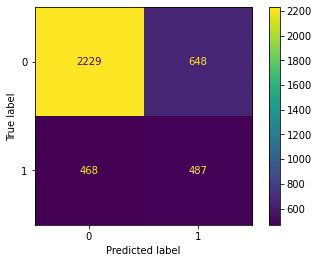

In [76]:
plot_confusion_matrix(dtc_default, X_test, y_test, values_format='.0f')

In [88]:
print("Candidates who predicted not change job but actually do:", round(468/(2229+468)*100,2),"%")
print("Candidates who predicted change job but actually not :", round(648/(487+648)*100,2),"%")

Candidates who predicted not change job but actually do: 17.35 %
Candidates who predicted change job but actually not : 57.09 %


In [77]:
dtc_tuned = dtcgridsearch.best_estimator_.fit(X_train_val, y_train_val)
y_pred_dtc_tuned = dtc_tuned.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred_dtc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68      2877
           1       0.37      0.81      0.51       955

    accuracy                           0.61      3832
   macro avg       0.63      0.68      0.59      3832
weighted avg       0.77      0.61      0.63      3832



After said model undergo hyperparameter tuning, the 'recall' score of said model is increasing dramatically, which became 0.81 when gets predicted to the X_test.

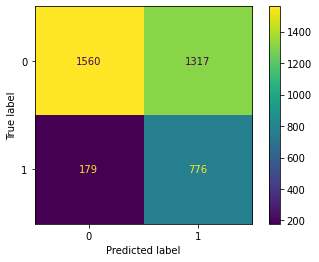

In [79]:
plot_confusion_matrix(dtc_tuned, X_test, y_test, values_format='.0f')

In [89]:
print("Candidates who predicted not change job but actually do:", round(179/(1560+179)*100,2),"%")
print("Candidates who predicted change job but actually not :", round(1317/(776+1317)*100,2),"%")

Candidates who predicted not change job but actually do: 10.29 %
Candidates who predicted change job but actually not : 62.92 %


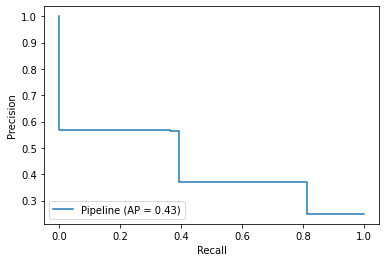

In [80]:
plot_precision_recall_curve(dtc_tuned, X_test, y_test) # abis dari sini di calibrate

In [81]:
p, r, t = precision_recall_curve(y_test, dtc_tuned.predict_proba(X_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
pr_df

,precision,recall,threshold
0,0.249217,1.000000,0.240740
1,0.370760,0.812565,0.517110
2,0.563910,0.392670,0.767766
3,0.567921,0.363351,0.819758


In [82]:
pr_df[(pr_df['recall'].between(0.8, 0.91)) & (pr_df['precision'].between(0.43, 0.5))].head(20)

,precision,recall,threshold


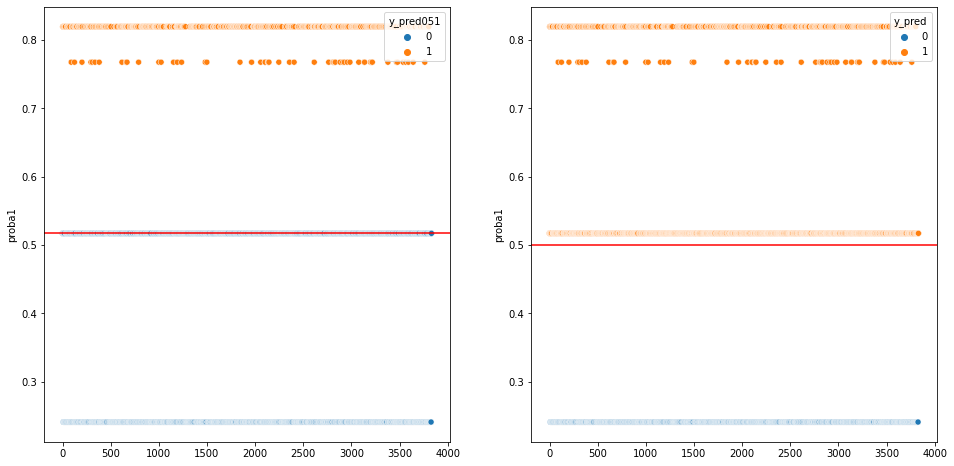

In [83]:
proba1 = dtc_tuned.predict_proba(X_test)[:,1]
y_pred = dtc_tuned.predict(X_test)
thresh =0.517110
pred_051 = np.where(proba1 > thresh, 1, 0)
res_df = pd.DataFrame({'proba1': proba1, 'y_pred': y_pred, 'y_pred051': pred_051})
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred051'])
plt.axhline(thresh, color='red')

plt.subplot(122)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred'])
plt.axhline(0.5, color='red')

In [84]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [85]:
make_conf_matrix(confusion_matrix(y_test, pred_051))

,p_0,p_1,total_actual
a_0,2587,290,2877
a_1,580,375,955
total_prediction,3167,665,3832


Conclusions:

1. The machine learning model is able to help the company to reduce the cost and save time by reducing candidates who are going to alter their occupations.
1. The result might be able to be improved by having more data on candidates who are going to alter their occupations.


In [86]:
import pickle

The saved model stays in DTC tuned and fit to X, y. because after setting the threshold it gets even worse 

In [87]:
dtc_tuned.fit(X,y)
filename = 'dtc_final.sav'
pickle.dump(dtc_tuned, open(filename, 'wb'))